In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_ramses import Brug

plt.style.use("classic")

# Zoeken van meest ideale parameters voor brug
## Exploratie van formules
### Probleemstelling
Berekeningen gaan uit van volgende situatie:
![Berekeningen](../figures/berekeningen_andreas2.0.svg)

In [3]:
brug = Brug(0.7, 0, 1, 1, 0.05, 0.05, 6)
brug.__dict__

{'h1': 0.7,
 'h2': 0,
 'd1a': 1,
 'd2a': 1,
 'd1b': 0.05,
 'd2b': 0.05,
 'N': 6,
 'cosa': 0.9445871380254132,
 'sina': 0.3282607784627322,
 'cosb': 1.0,
 'sinb': 0.0}

In [4]:
brug.calc_reactie_krachten()

[58.75714285714285,
 117.5142857142857,
 250.84761904761905,
 184.18095238095236,
 117.5142857142857,
 117.5142857142857,
 117.5142857142857,
 58.75714285714285]

In [5]:
brug.calc_touw_kracht()

([357.9906386154727,
  764.1717667957643,
  561.0812027056185,
  357.9906386154727,
  357.9906386154727,
  357.9906386154727],
 [338.1533527696793,
  721.8268221574344,
  529.9900874635568,
  338.1533527696793,
  338.1533527696793,
  338.1533527696793])

In [6]:
brug.calc_kant()

(-717.1496598639455,
 -2604.4303206997083,
 (338.1533527696793,
  727.2495912597074,
  545.7421586829992,
  360.37281747928864,
  376.74973292355725,
  396.8138591916331),
 -0.0,
 -2604.4303206997083,
 (338.1533527696793,
  721.8268221574344,
  529.9900874635568,
  338.1533527696793,
  338.1533527696793,
  338.1533527696793))

### Wegdek

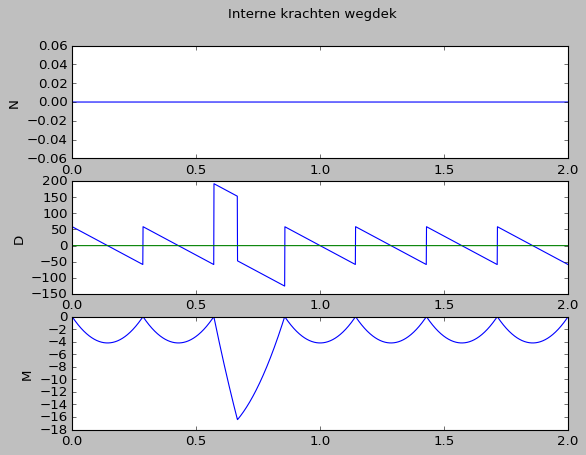

In [7]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten wegdek")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M")
plt.savefig("figs/wegdek-ramses")

### Doorbuiging wegdek

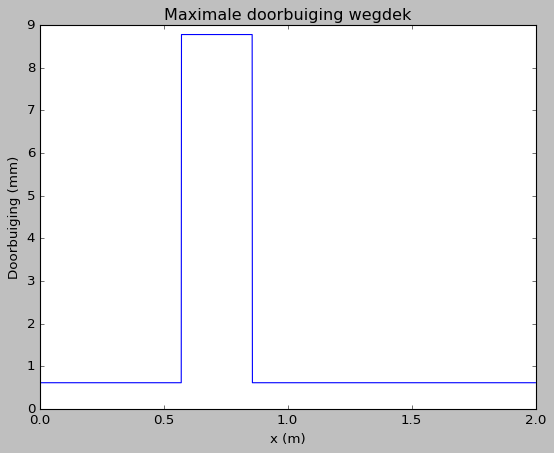

In [8]:
x = np.arange(0, 2, 0.001)
f = [brug.calc_doorbuiging_wegdek(xi)*10**3 for xi in x]

plt.plot(x, f)
plt.title("Maximale doorbuiging wegdek")
plt.xlabel("x (m)")
plt.ylabel("Doorbuiging (mm)")
plt.savefig("figs/wegdek-doorbuiging-ramses")

### Piloon 1

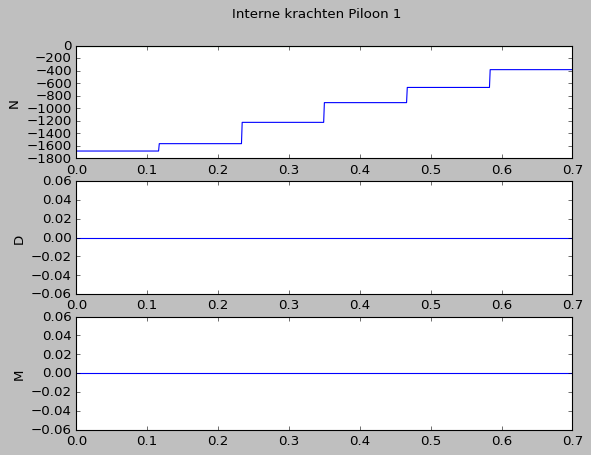

In [9]:
x = np.arange(0, brug.h1, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, True) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten Piloon 1")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")
plt.savefig("figs/piloon1-ramses")

### Piloon 2

In [10]:
x = np.arange(0, brug.h2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, False) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten piloon 2")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")
plt.savefig("figs/piloon2-ramses")

ValueError: not enough values to unpack (expected 3, got 0)

### Traagheidsmoment

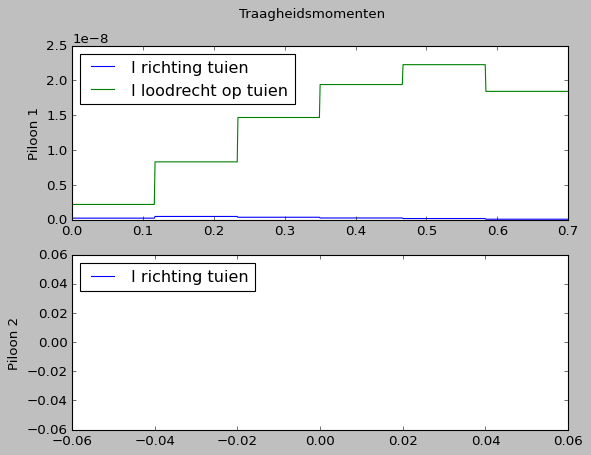

In [11]:
step = 0.001

x1 = np.arange(0, brug.h1, step)
I1 = [brug.calc_piloon_I(xi, True) for xi in x1]
x2 = np.arange(0, brug.h2, step)
I2 = [brug.calc_piloon_I(xi, False) for xi in x2]

fig = plt.figure()
fig.suptitle("Traagheidsmomenten")
ax1 = plt.subplot(2,1,1)
ax1.plot(x1, I1)
ax1.set_ylabel("Piloon 1")
ax1.legend(["I richting tuien", "I loodrecht op tuien"], loc="upper left")
ax2 = plt.subplot(2,1,2)
ax2.plot(x2, I2)
ax2.set_ylabel("Piloon 2")
ax2.legend(["I richting tuien", "I loodrecht op tuien"], loc="upper left")
plt.savefig("figs/traagheid-ramses")

### Kleine balk uit I

IndexError: list index out of range

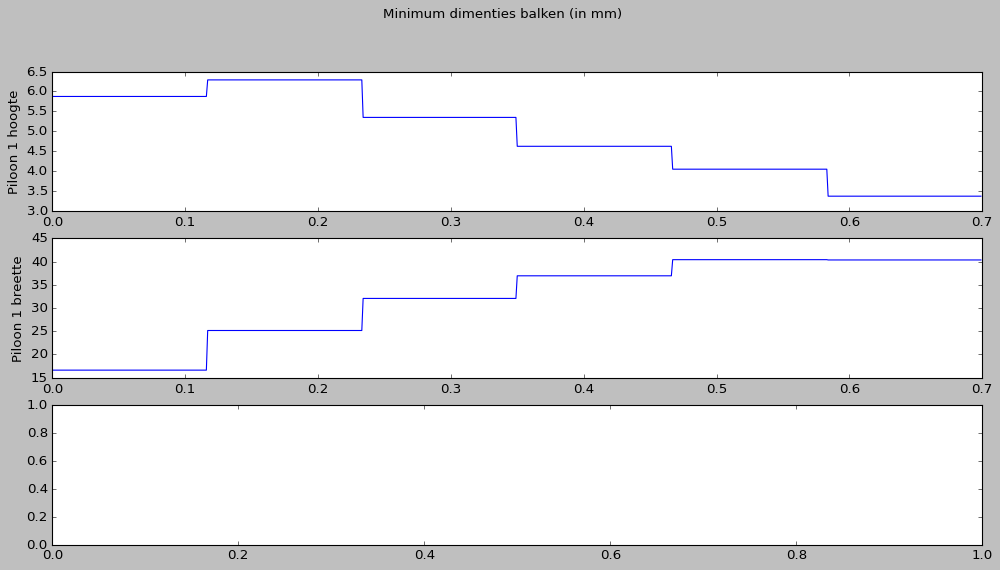

In [12]:
step = 0.001

x1 = np.arange(0, brug.h1, step)
hb1 = list(zip(*[brug.calc_piloon_balk(xi, True) for xi in x1]))
x2 = np.arange(0, brug.h2, step)
hb2 = list(zip(*[brug.calc_piloon_balk(xi, False) for xi in x2]))

fig = plt.figure(figsize=(15, 10))
fig.suptitle("Minimum dimenties balken (in mm)")
ax1 = plt.subplot(4,1,1)
ax1.plot(x1, [h1*1000 for h1 in hb1[0]])
ax1.set_ylabel("Piloon 1 hoogte")
ax2 = plt.subplot(4,1,2)
ax2.plot(x1, [b1*1000 for b1 in hb1[1]])
ax2.set_ylabel("Piloon 1 breette")
ax3 = plt.subplot(4,1,3)
ax3.plot(x2, [h2*1000 for h2 in hb2[0]])
ax3.set_ylabel("Piloon 2 hoogte")
ax4 = plt.subplot(4,1,4)
ax4.plot(x2, [b2*1000 for b2 in hb2[1]])
ax4.set_ylabel("Piloon 2 breette")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("figs/minimum-balk-dim-ramses")